Assignment3

จัดทำโดย 

ณัชณศา เลิศมหากูล 65340500021

อนวัช อนุสุเรนทร์ 65340500056

ชัญญาภัค ทรัพย์สวัสดิ์กุล 65340500067

## Import library

In [1]:
# Fetch a dataset from the UCI Machine Learning Repository
from ucimlrepo import fetch_ucirepo

# Functions for statistical computations, such as Box-Cox transformation
from scipy.stats import boxcox

# Split arrays or matrices into random train and test subsets
from sklearn.model_selection import train_test_split

# Imputation methods for filling in missing values (SimpleImputer and KNNImputer)
from sklearn.impute import SimpleImputer, KNNImputer

# Encode categorical variables into numeric labels
from sklearn.preprocessing import LabelEncoder

# Standardize features by removing the mean and scaling to unit variance
from sklearn.preprocessing import StandardScaler

# Scaling features to a given range (e.g., 0 to 1)
from sklearn.preprocessing import MinMaxScaler

# Hyperparameter tuning using grid search with cross-validation
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning using Randomized Search
from sklearn.model_selection import RandomizedSearchCV

# Performance metrics for classification tasks
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix

# Perform cross-validation
from sklearn.model_selection import cross_val_score

# Libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical functions and utilities (e.g., Z-scores, normality tests)
from scipy import stats

# Core library for data manipulation and analysis
import pandas as pd

# Numeric computations (e.g., arrays, matrices, mathematical functions)
import numpy as np

# Utilities for handling files and directories
import shutil
import os

# Machine learning models from Scikit-learn
from sklearn.ensemble import RandomForestClassifier  # Random Forest Classifier
from sklearn.svm import SVC                        # Support Vector Classifier
from sklearn.neural_network import MLPClassifier    # Multi-layer Perceptron Classifier
from sklearn.linear_model import LinearRegression   # Linear Regression Model


# Calculate the accuracy of a model's predictions
from sklearn.metrics import accuracy_score

# Hyperparameter tuning using Bayesian Search
from skopt import BayesSearchCV

from skopt.space import Real, Integer


Import Data

In [10]:
# Fetch dataset 
support2 = fetch_ucirepo(id=880) 

X = support2.data.features 
y = support2.data.targets 

# Combine features and targets into a single DataFrame, if desired
df = pd.concat([X, y], axis=1)

# Save to CSV
# df.to_csv('output.csv', index=False)
# Move the file to a location where it can be accessed/downloaded
# shutil.move('output.csv', 'csv')

# metadata 
print(support2.metadata) 

# variable information 
print(support2.variables)

df = pd.read_csv('data.csv', header = None)
df.columns = ['id','age','death','sex','hospdead','slos','d.time','dzgroup','dzclass','num.co','edu','income','scoma','charges','totcst','totmcst','avtisst','race','sps','aps','surv2m','surv6m','hday','diabetes','dementia','ca','prg2m','prg6m','dnr','dnrday','meanbp','wblc','hrt','resp','temp','pafi','alb','bili','crea','sod','ph','glucose','bun','urine','adlp','adls','sfdm2','adlsc']
num_columns = len(df.columns)
print(f"จำนวนคอลัมน์ทั้งหมด: {num_columns}")
df.head()


{'uci_id': 880, 'name': 'SUPPORT2', 'repository_url': 'https://archive.ics.uci.edu/dataset/880/support2', 'data_url': 'https://archive.ics.uci.edu/static/public/880/data.csv', 'abstract': "This dataset comprises 9105 individual critically ill patients across 5 United States medical centers, accessioned throughout 1989-1991 and 1992-1994.\nEach row concerns hospitalized patient records who met the inclusion and exclusion criteria for nine disease categories: acute respiratory failure, chronic obstructive pulmonary disease, congestive heart failure, liver disease, coma, colon cancer, lung cancer, multiple organ system failure with malignancy, and multiple organ system failure with sepsis. The goal is to determine these patients' 2- and 6-month survival rates based on several physiologic, demographics, and disease severity information. \nIt is an important problem because it addresses the growing national concern over patients' loss of control near the end of life. It enables earlier deci

id       age  death     sex  hospdead  slos  d.time      dzgroup  \
0  id       age  death     sex  hospdead  slos  d.time      dzgroup   
1   1  62.84998      0    male         0     5    2029  Lung Cancer   
2   2  60.33899      1  female         1     4       4    Cirrhosis   
3   3  52.74698      1  female         0    17      47    Cirrhosis   
4   4  42.38498      1  female         0     3     133  Lung Cancer   

              dzclass  num.co  ...        crea  sod        ph  glucose  bun  \
0             dzclass  num.co  ...        crea  sod        ph  glucose  bun   
1              Cancer       0  ...  1.19995117  141  7.459961      NaN  NaN   
2  COPD/CHF/Cirrhosis       2  ...         5.5  132      7.25      NaN  NaN   
3  COPD/CHF/Cirrhosis       2  ...           2  134  7.459961      NaN  NaN   
4              Cancer       2  ...  0.79992676  139       NaN      NaN  NaN   

   urine  adlp  adls                sfdm2  adlsc  
0  urine  adlp  adls                sfdm2  adlsc  
1    NaN     7     7                  NaN      7  
2    NaN   NaN     1     <2 mo. follow-up      1  
3    NaN     1     0     <2 mo. follow-up      0  
4    NaN     0     0  no(M2 and SIP pres)      0  

[5 rows x 48 columns]

In [ ]:
# Fetch dataset 
support2 = fetch_ucirepo(id=880) 

X = support2.data.features 
y = support2.data.targets 

# Combine features and targets into a single DataFrame, if desired
df = pd.concat([X, y], axis=1)

# Save to CSV
# df.to_csv('output.csv', index=False)
# Move the file to a location where it can be accessed/downloaded
# shutil.move('output.csv', 'csv')

# metadata 
print(support2.metadata) 

# variable information 
print(support2.variables)

df = pd.read_csv('data.csv', header = None)
df.columns = ['id','age','death','sex','hospdead','slos','d.time','dzgroup','dzclass','num.co','edu','income','scoma','charges','totcst','totmcst','avtisst','race','sps','aps','surv2m','surv6m','hday','diabetes','dementia','ca','prg2m','prg6m','dnr','dnrday','meanbp','wblc','hrt','resp','temp','pafi','alb','bili','crea','sod','ph','glucose','bun','urine','adlp','adls','sfdm2','adlsc']
num_columns = len(df.columns)
print(f"จำนวนคอลัมน์ทั้งหมด: {num_columns}")
df.head()


{'uci_id': 880, 'name': 'SUPPORT2', 'repository_url': 'https://archive.ics.uci.edu/dataset/880/support2', 'data_url': 'https://archive.ics.uci.edu/static/public/880/data.csv', 'abstract': "This dataset comprises 9105 individual critically ill patients across 5 United States medical centers, accessioned throughout 1989-1991 and 1992-1994.\nEach row concerns hospitalized patient records who met the inclusion and exclusion criteria for nine disease categories: acute respiratory failure, chronic obstructive pulmonary disease, congestive heart failure, liver disease, coma, colon cancer, lung cancer, multiple organ system failure with malignancy, and multiple organ system failure with sepsis. The goal is to determine these patients' 2- and 6-month survival rates based on several physiologic, demographics, and disease severity information. \nIt is an important problem because it addresses the growing national concern over patients' loss of control near the end of life. It enables earlier deci

id       age  death     sex  hospdead  slos  d.time      dzgroup  \
0  id       age  death     sex  hospdead  slos  d.time      dzgroup   
1   1  62.84998      0    male         0     5    2029  Lung Cancer   
2   2  60.33899      1  female         1     4       4    Cirrhosis   
3   3  52.74698      1  female         0    17      47    Cirrhosis   
4   4  42.38498      1  female         0     3     133  Lung Cancer   

              dzclass  num.co  ...        crea  sod        ph  glucose  bun  \
0             dzclass  num.co  ...        crea  sod        ph  glucose  bun   
1              Cancer       0  ...  1.19995117  141  7.459961      NaN  NaN   
2  COPD/CHF/Cirrhosis       2  ...         5.5  132      7.25      NaN  NaN   
3  COPD/CHF/Cirrhosis       2  ...           2  134  7.459961      NaN  NaN   
4              Cancer       2  ...  0.79992676  139       NaN      NaN  NaN   

   urine  adlp  adls                sfdm2  adlsc  
0  urine  adlp  adls                sfdm2  adlsc  
1    NaN     7     7                  NaN      7  
2    NaN   NaN     1     <2 mo. follow-up      1  
3    NaN     1     0     <2 mo. follow-up      0  
4    NaN     0     0  no(M2 and SIP pres)      0  

[5 rows x 48 columns]

Cleaning Data

- ตัด column ที่มี missing value มากกว่า 40% และตัด row ที่มี missing value มากกว่า 30% เพราะปริมาณข้อมูลที่สูญหายมากเกินไป 
จึงไม่สามารถใช้วิธีนำมาเติม Missing Value ได้

In [6]:
# เก็บจำนวนคอลัมน์และแถวก่อนการลบ
cols_before = df.columns
rows_before = df.shape[0]

# ลบคอลัมน์ที่มีค่าหายไปมากกว่า 40%
df = df.loc[:, df.isnull().mean() < 0.4]
cols_after = df.columns

# ลบแถวที่มีค่าหายไปมากกว่า 30%
df = df.dropna(thresh=len(df.columns) * 0.7)
rows_after = df.shape[0]

# คำนวณจำนวนคอลัมน์ที่ถูกลบออก
cols_dropped = set(cols_before) - set(cols_after)

# คำนวณจำนวนแถวที่ถูกลบ
rows_dropped = rows_before - rows_after

# แสดงผลลัพธ์
print("cols_before : ",cols_before)
print("cols_After : ",cols_after)
print("คอลัมน์ที่ถูกลบ:")
print(cols_dropped)
print("\nคอลัมน์ที่ยังคงอยู่:")
print(df.columns)
print(f"\nจำนวนแถวที่ถูกลบ: {rows_dropped}")
print("\nข้อมูลตัวอย่างหลังการลบ:")

#ปริ้นตารางมาเช็ค
df.head()


cols_before :  Index(['id', 'age', 'death', 'sex', 'hospdead', 'slos', 'd.time', 'dzgroup',
       'dzclass', 'num.co', 'edu', 'income', 'scoma', 'charges', 'totcst',
       'totmcst', 'avtisst', 'race', 'sps', 'aps', 'surv2m', 'surv6m', 'hday',
       'diabetes', 'dementia', 'ca', 'prg2m', 'prg6m', 'dnr', 'dnrday',
       'meanbp', 'wblc', 'hrt', 'resp', 'temp', 'pafi', 'alb', 'bili', 'crea',
       'sod', 'ph', 'glucose', 'bun', 'urine', 'adlp', 'adls', 'sfdm2',
       'adlsc'],
      dtype='object')
cols_After :  Index(['id', 'age', 'death', 'sex', 'hospdead', 'slos', 'd.time', 'dzgroup',
       'dzclass', 'num.co', 'edu', 'income', 'scoma', 'charges', 'totcst',
       'totmcst', 'avtisst', 'race', 'sps', 'aps', 'surv2m', 'surv6m', 'hday',
       'diabetes', 'dementia', 'ca', 'prg2m', 'prg6m', 'dnr', 'dnrday',
       'meanbp', 'wblc', 'hrt', 'resp', 'temp', 'pafi', 'alb', 'bili', 'crea',
       'sod', 'ph', 'adls', 'sfdm2', 'adlsc'],
      dtype='object')
คอลัมน์ที่ถูกลบ:
{'bun', 'g

id       age  death     sex  hospdead  slos  d.time      dzgroup  \
0  id       age  death     sex  hospdead  slos  d.time      dzgroup   
1   1  62.84998      0    male         0     5    2029  Lung Cancer   
2   2  60.33899      1  female         1     4       4    Cirrhosis   
3   3  52.74698      1  female         0    17      47    Cirrhosis   
4   4  42.38498      1  female         0     3     133  Lung Cancer   

              dzclass  num.co  ...      temp       pafi        alb  \
0             dzclass  num.co  ...      temp       pafi        alb   
1              Cancer       0  ...        36        388  1.7998047   
2  COPD/CHF/Cirrhosis       2  ...  34.59375         98        NaN   
3  COPD/CHF/Cirrhosis       2  ...  37.39844  231.65625        NaN   
4              Cancer       2  ...        35        NaN        NaN   

         bili        crea  sod        ph  adls                sfdm2  adlsc  
0        bili        crea  sod        ph  adls                sfdm2  adlsc  
1  0.19998169  1.19995117  141  7.459961     7                  NaN      7  
2         NaN         5.5  132      7.25     1     <2 mo. follow-up      1  
3  2.19970703           2  134  7.459961     0     <2 mo. follow-up      0  
4         NaN  0.79992676  139       NaN     0  no(M2 and SIP pres)      0  

[5 rows x 44 columns]

Change to Numeric 

- เปลี่ยน data ที่ยังเป็น type อื่นที่ไม่ใช่  numeric ให้เป็น numeric เพื่อสามารถใช้งานร่วมกันกับ Target ได้

In [7]:
#เลือก Column ที่มั่นใจว่าไม่ใช่ Numeric
categorical_columns = ['sex','income','race','ca', 'dzgroup', 'dzclass', 'dnr' , 'sfdm2'] 
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder() # ใช้การ Encoder ในการแปลง
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le
print(f"Categorical columns: {categorical_columns}")
df[categorical_columns].head()

Categorical columns: ['sex', 'income', 'race', 'ca', 'dzgroup', 'dzclass', 'dnr', 'sfdm2']


sex  income  race  ca  dzgroup  dzclass  dnr  sfdm2
0    2       3     5   0        8        4    0      6
1    1       0     4   1        6        2    4      4
2    0       0     6   2        3        1    3      0
3    0       5     6   2        3        1    4      0
4    0       5     6   1        6        2    4      5

แปลง data ที่เป็น string ของตัวเลขให้เป็น numeric 

In [8]:
# แปลงคอลัมน์ที่ควรเป็นตัวเลขทั้งหมด
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # แปลงเป็นตัวเลข ถ้าไม่สามารถแปลงได้จะกลายเป็น NaN


Missing Value 

จัดการข้อมูลที่หายไปโดยหา method ที่ดีที่สุดของแต่ละ column มาเติม Missing value ซึ่งประกอบด้วยวิธีดังนี้
- mean
- mode
- hot-deck
- Nearest Neighbor
- Regression(ใช้ไม่ได้เพราะทุกแถวมี Missing value หมดจึงหาแถวที่สมบูรณ์มาเทียบไม่ได้)


In [9]:
# ฟังก์ชันสำหรับ hot-deck imputation (ใช้ KNN)
def hot_deck_imputation(X_train, X_test):
    imputer = KNNImputer(n_neighbors=5)
    X_train_imputed = imputer.fit_transform(X_train)
    X_test_imputed = imputer.transform(X_test)
    return X_train_imputed, X_test_imputed

In [10]:
def evaluate_imputation(method, df, target_col='charges'):
    # แบ่งข้อมูลเป็นชุดฝึกและชุดทดสอบ
    df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
    
    X_train = df_train.drop(columns=[target_col])
    y_train = df_train[target_col]
    
    X_test = df_test.drop(columns=[target_col])
    y_test = df_test[target_col]
    
    # Handle missing values in the target variable
    y_train = pd.to_numeric(y_train, errors='coerce') 
    y_test = pd.to_numeric(y_test, errors='coerce')

    y_train = y_train.fillna(y_train.mean())
    y_test = y_test.fillna(y_test.mean())
    
    if method == 'mean':
        imputer = SimpleImputer(strategy='mean')
        X_train_imputed = imputer.fit_transform(X_train)
        X_test_imputed = imputer.transform(X_test)

    elif method == 'mode':
        imputer = SimpleImputer(strategy='most_frequent')
        X_train_imputed = imputer.fit_transform(X_train)
        X_test_imputed = imputer.transform(X_test)
        
    elif method == 'hot_deck':
        # Hot-deck Imputation (Using KNN)
        X_train_imputed, X_test_imputed = hot_deck_imputation(X_train, X_test)
    
    elif method == 'nearest_neighbor':
        # Nearest Neighbor (KNNImputer)
        imputer = KNNImputer(n_neighbors=5)
        X_train_imputed = imputer.fit_transform(X_train)
        X_test_imputed = imputer.transform(X_test)

    else:
        raise ValueError(f"Unknown method: {method}")

    # Train a Linear Regression model
    model = LinearRegression()
    model.fit(X_train_imputed, y_train)
    
    # Predict and calculate MSE
    y_pred = model.predict(X_test_imputed)
    mse = mean_squared_error(y_test, y_pred)
    
    return mse

หา method ที่ดีที่สุดในการเติม missing value โดยดูจากค่า MSE ที่ต่ำที่สุด

In [11]:
# รายการวิธีการที่จะทดสอบ 
methods = ['mean', 'mode', 'hot_deck', 'nearest_neighbor']
results = {}

# สร้างสำเนาข้อมูลเพื่อเติมค่า
df_filled = df.copy()

for col in df.columns:
    print(f"\nTesting column: {col}")
    results[col] = {}

    # วนลูปทดสอบแต่ละวิธีการเติมค่าที่หายไป
    for method in methods:
        try:
            print(f"  Method: {method}")
            mse = evaluate_imputation(method, df, target_col=col)
            results[col][method] = mse
            print(f"    MSE: {mse}")
        except ValueError as e:
            print(f"    Error with method {method}: {e}")

    # หาวิธีที่ดีที่สุดที่มีค่า MSE ต่ำที่สุด
    best_method = min(results[col], key=results[col].get)
    print(f"Best method for {col}: {best_method}")

    # เติมค่า Missing Value ใน df_filled สำหรับคอลัมน์นั้นด้วยวิธีที่ดีที่สุด
    if best_method == 'mean':
        imputer = SimpleImputer(strategy='mean')
    elif best_method == 'mode':
        imputer = SimpleImputer(strategy='most_frequent')
    elif best_method == 'hot_deck':
        imputer = KNNImputer(n_neighbors=5)
    elif best_method == 'nearest_neighbor':
        imputer = KNNImputer(n_neighbors=5)

    # เติมค่าในคอลัมน์นั้นๆ
    df_filled[col] = df_filled[col].mask(df_filled[col].isna(), imputer.fit_transform(df[[col]]).flatten())

# บันทึกผลลัพธ์ลงในไฟล์ CSV
output_file = 'filled_data.csv'
df_filled.to_csv(output_file, index=False)
shutil.move('filled_data.csv', 'csv')
print(f"\nCompleted filling missing values. Results saved to {output_file}")


Testing column: id
  Method: mean
    MSE: 5248006.0483458815
  Method: mode
    MSE: 5065993.869988904
  Method: hot_deck
    MSE: 5306560.117732769
  Method: nearest_neighbor
    MSE: 5306560.117732769
Best method for id: mode

Testing column: age
  Method: mean
    MSE: 128.08762350494794
  Method: mode
    MSE: 128.5494661195713
  Method: hot_deck
    MSE: 128.09611571880808
  Method: nearest_neighbor
    MSE: 128.09611571880808
Best method for age: mean

Testing column: death
  Method: mean
    MSE: 0.09636628484034378
  Method: mode
    MSE: 0.09518936280582553
  Method: hot_deck
    MSE: 0.09564997411402323
  Method: nearest_neighbor
    MSE: 0.09564997411402323
Best method for death: mode

Testing column: sex
  Method: mean
    MSE: 0.24142530756384056
  Method: mode
    MSE: 0.24155892417087624
  Method: hot_deck
    MSE: 0.24173357526745798
  Method: nearest_neighbor
    MSE: 0.24173357526745798
Best method for sex: mean

Testing column: hospdead
  Method: mean
    MSE: 0.06

Error: Destination path 'csv\filled_data.csv' already exists

Histogram of Feature 

- plot histogram graph เพื่อดูการกระจายตัว(Distribution)ของข้อมูลว่ามีความสมมาตร/เบ้ขวา/เบ้ซ้ายมากน้อยเพียงใด

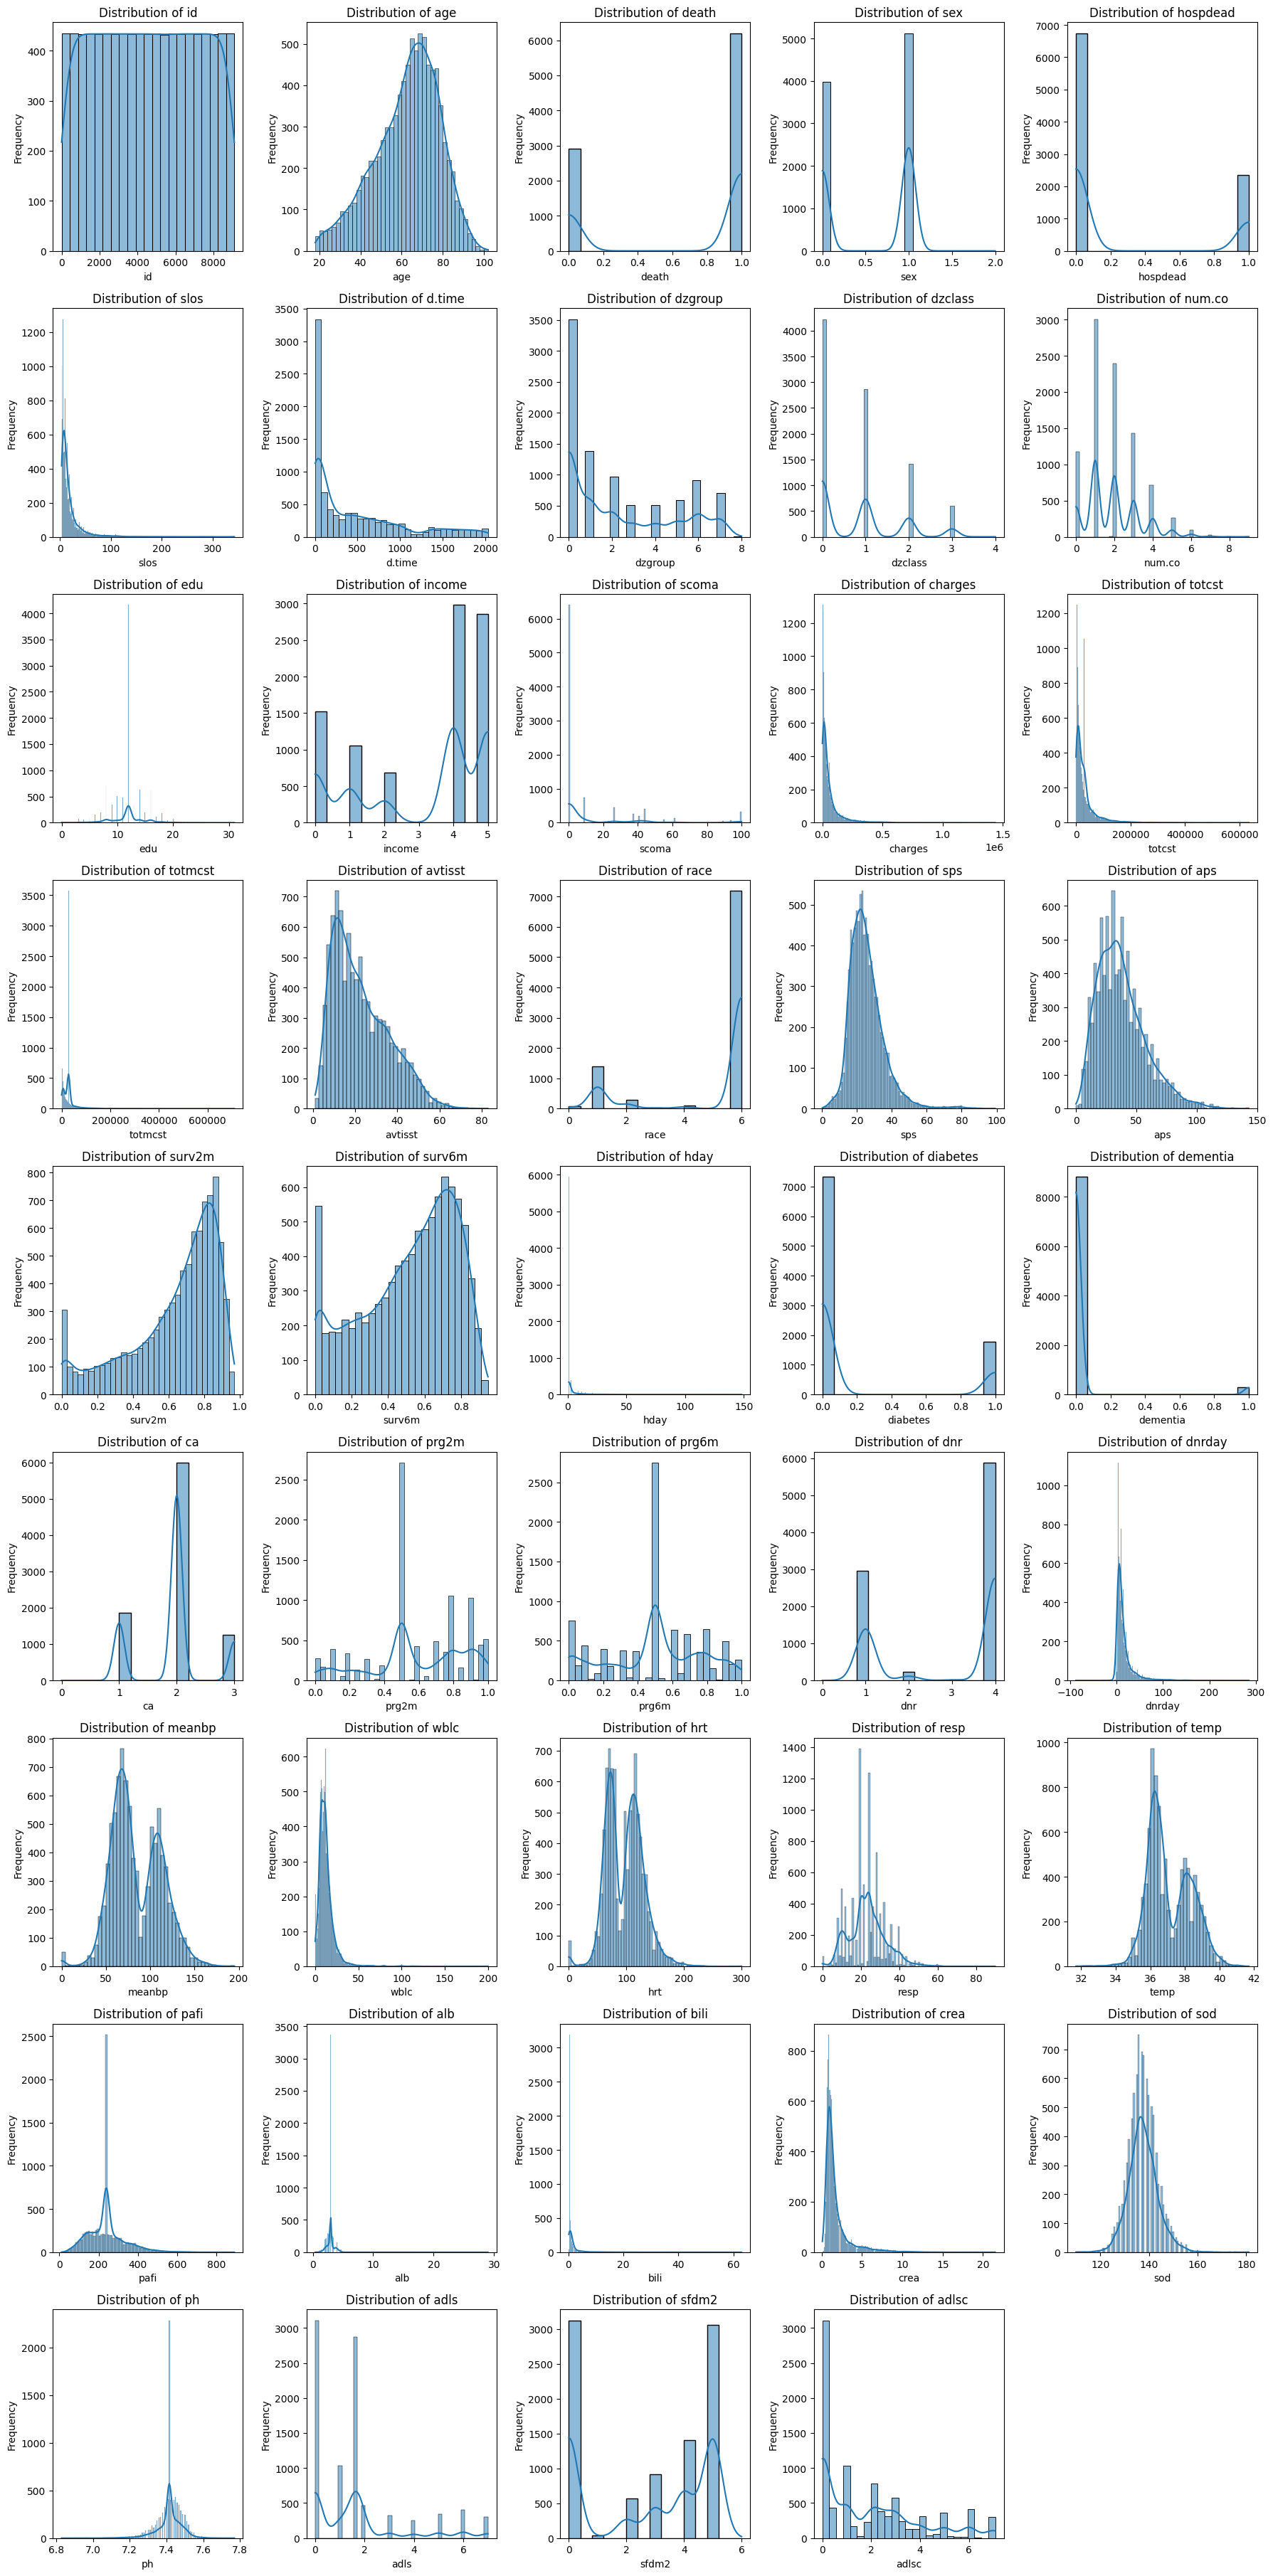

In [37]:
file_path = './csv/filled_data.csv'
data = pd.read_csv(file_path)


num_columns = len(data.columns)

# Set the number of rows and columns for subplots
n_rows = (num_columns // 3) + 1
n_cols = 5

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 4))

# Flatten axes array for easier iteration
axes = axes.flatten()

# Plot histograms for each column
for i, column in enumerate(data.columns):
    sns.histplot(data[column], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_ylabel('Frequency')

# Remove any extra subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Plot Outliner Graph of Feature

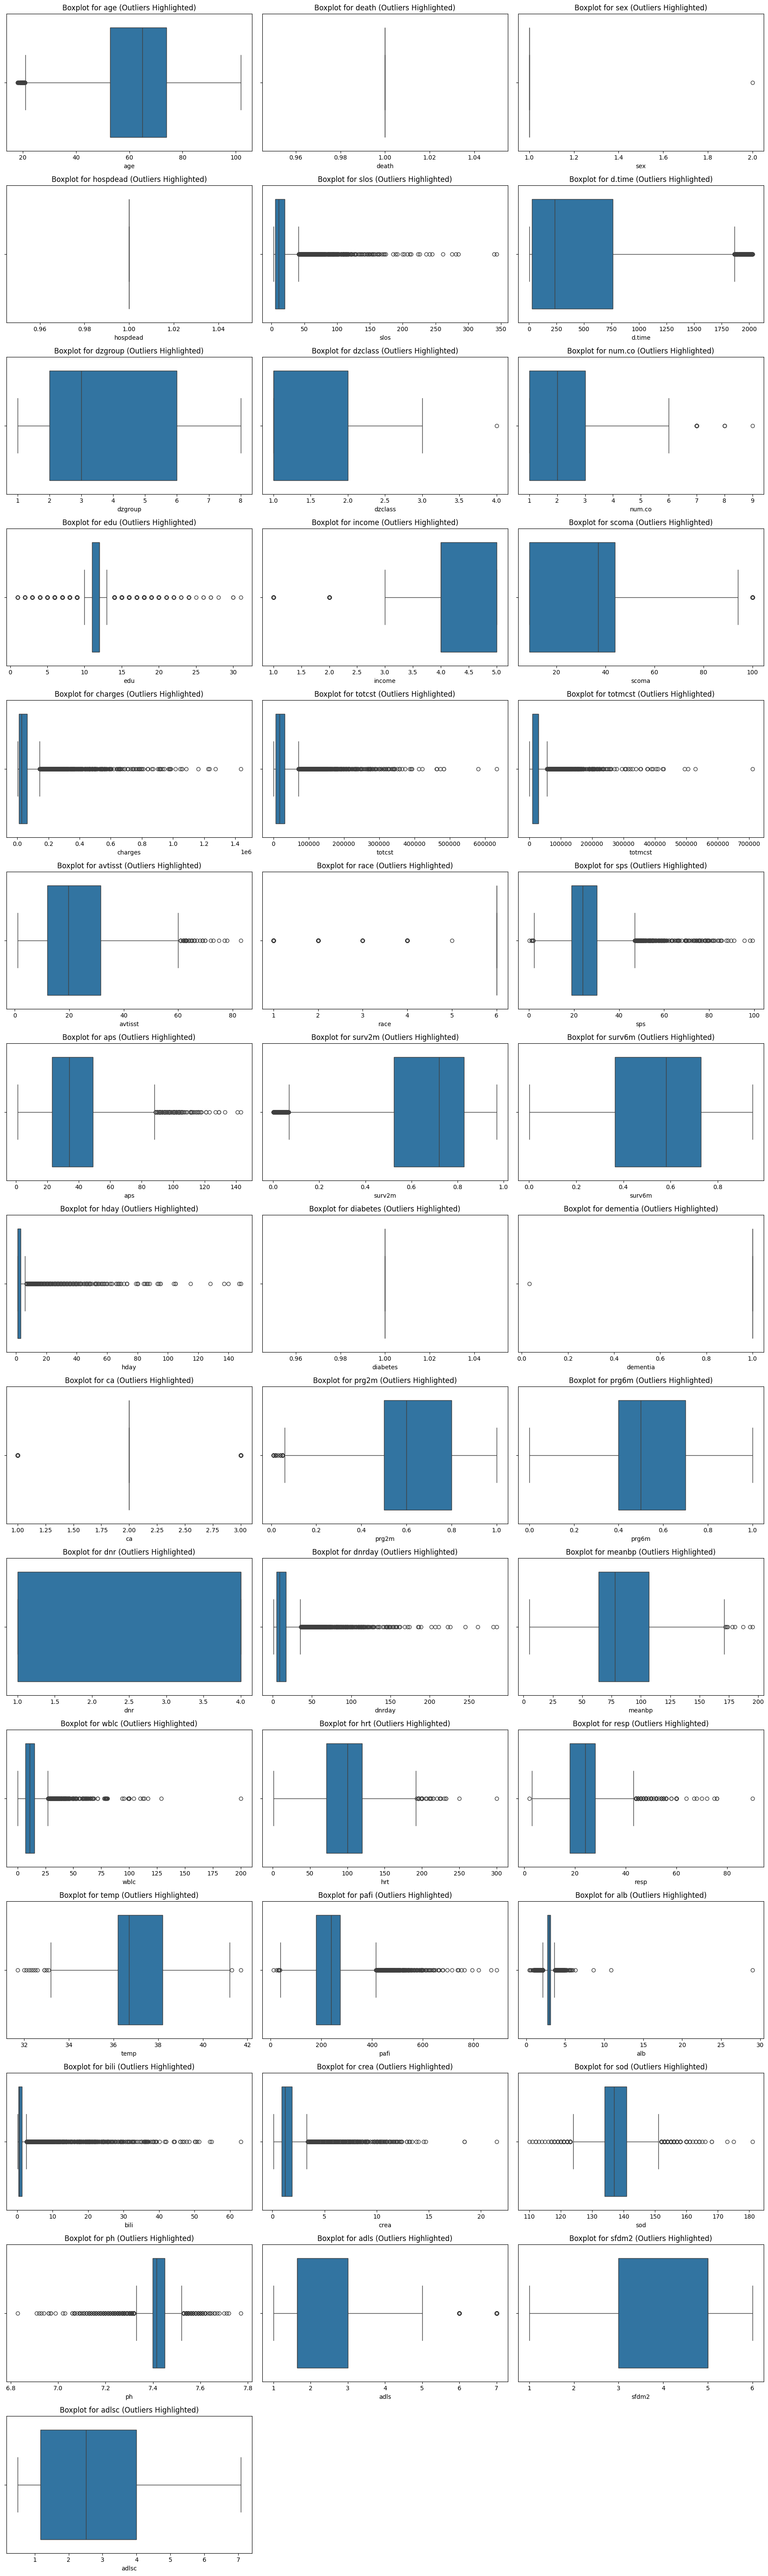

In [38]:
# Columns to apply transformations
columns_to_transform = ['age', 'death', 'sex', 'hospdead', 'slos', 'd.time', 'dzgroup',
       'dzclass', 'num.co', 'edu', 'income', 'scoma', 'charges', 'totcst',
       'totmcst', 'avtisst', 'race', 'sps', 'aps', 'surv2m', 'surv6m', 'hday',
       'diabetes', 'dementia', 'ca', 'prg2m', 'prg6m', 'dnr', 'dnrday',
       'meanbp', 'wblc', 'hrt', 'resp', 'temp', 'pafi', 'alb', 'bili', 'crea',
       'sod', 'ph', 'adls', 'sfdm2', 'adlsc']

# Function to plot outliers
def plot_outliers(column_data, column_name, ax):
    sns.boxplot(x=column_data, ax=ax)
    ax.set_title(f'Boxplot for {column_name} (Outliers Highlighted)')
    ax.set_xlabel(column_name)

# Set the number of rows and columns for subplots
num_columns = len(columns_to_transform)
n_rows = (num_columns // 3) + 1
n_cols = 3

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 4))
axes = axes.flatten()

# Loop through each column and plot outliers
for i, column in enumerate(columns_to_transform):
    if column in data.columns and column != 'id':
        # Filter out non-positive values
        data_filtered = data[data[column] > 0][column]

        if len(data_filtered) > 0:
            # Plot the boxplot for outliers
            plot_outliers(data_filtered, column, axes[i])
        else:
            print(f"Skipping column '{column}' because it has no positive values.")
    else:
        print(f"Column '{column}' not found in the dataset.")

# Remove any extra subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

ตรวจสอบ Feature ที่มี Outliner และนำค่าออกโดยใช้วิธี Standard Deviation-based Method

In [41]:
file_path = './csv/filled_data.csv'
data = pd.read_csv(file_path)

feature_columns = ['id', 'age', 'death', 'sex', 'hospdead', 'slos', 'd.time', 'dzgroup', 
                   'dzclass', 'num.co', 'edu', 'income', 'scoma', 'charges', 'totcst',
                   'totmcst', 'avtisst', 'race', 'sps', 'aps', 'surv2m', 'surv6m', 'hday',
                   'diabetes', 'dementia', 'ca', 'prg2m', 'prg6m', 'dnr', 'dnrday',
                   'meanbp', 'wblc', 'hrt', 'resp', 'temp', 'pafi', 'alb', 'bili', 'crea',
                   'sod', 'ph', 'adls', 'sfdm2', 'adlsc']

numeric_columns = data[feature_columns].select_dtypes(include=['int64', 'float64']).columns.tolist()
outlier_columns = numeric_columns.copy()
df_std = data.copy()

print("Standard Deviation-based Method")
for column in outlier_columns:
    mean = df_std[column].mean()
    std_dev = df_std[column].std()
    
    min_border = mean - 3 * std_dev
    max_border = mean + 3 * std_dev
    
    # ระบุแถวที่มีค่าเป็น Outliers
    outliers = df_std[(df_std[column] < min_border) | (df_std[column] > max_border)].index
    print(f"{len(outliers)} outliers detected in column '{column}'")
    
    # ลบแถวที่เป็น Outliers
    output = df_std.drop(outliers, inplace=True)

print("\nจำนวนแถวหลังจากลบ Outliers ด้วยวิธี Standard Deviation:", df_std.shape)

# บันทึกผลลัพธ์ลงในไฟล์ CSV
output_file = 'filled_no_outliner.csv'
df_std.to_csv(output_file, index=False)
shutil.move('filled_no_outliner.csv', 'csv')
print(f"\nResults saved to {output_file}")

Standard Deviation-based Method
0 outliers detected in column 'id'
0 outliers detected in column 'age'
0 outliers detected in column 'death'
0 outliers detected in column 'sex'
0 outliers detected in column 'hospdead'
204 outliers detected in column 'slos'
0 outliers detected in column 'd.time'
0 outliers detected in column 'dzgroup'
1 outliers detected in column 'dzclass'
123 outliers detected in column 'num.co'
108 outliers detected in column 'edu'
0 outliers detected in column 'income'
433 outliers detected in column 'scoma'
167 outliers detected in column 'charges'
194 outliers detected in column 'totcst'
178 outliers detected in column 'totmcst'
59 outliers detected in column 'avtisst'
0 outliers detected in column 'race'
79 outliers detected in column 'sps'
61 outliers detected in column 'aps'
86 outliers detected in column 'surv2m'
0 outliers detected in column 'surv6m'
192 outliers detected in column 'hday'
0 outliers detected in column 'diabetes'
233 outliers detected in colum

Plot Histrogram graph(with Outliner) VS Histrogram graph(without Outliner)

- plot histogram graph ก่อนเอาoutlinerออกเปรียบเทียบกับหลังเอาoutlinerออก เพื่อตรวจสอบว่ากราฟมีการกระจายตัวที่ดีขึ้น

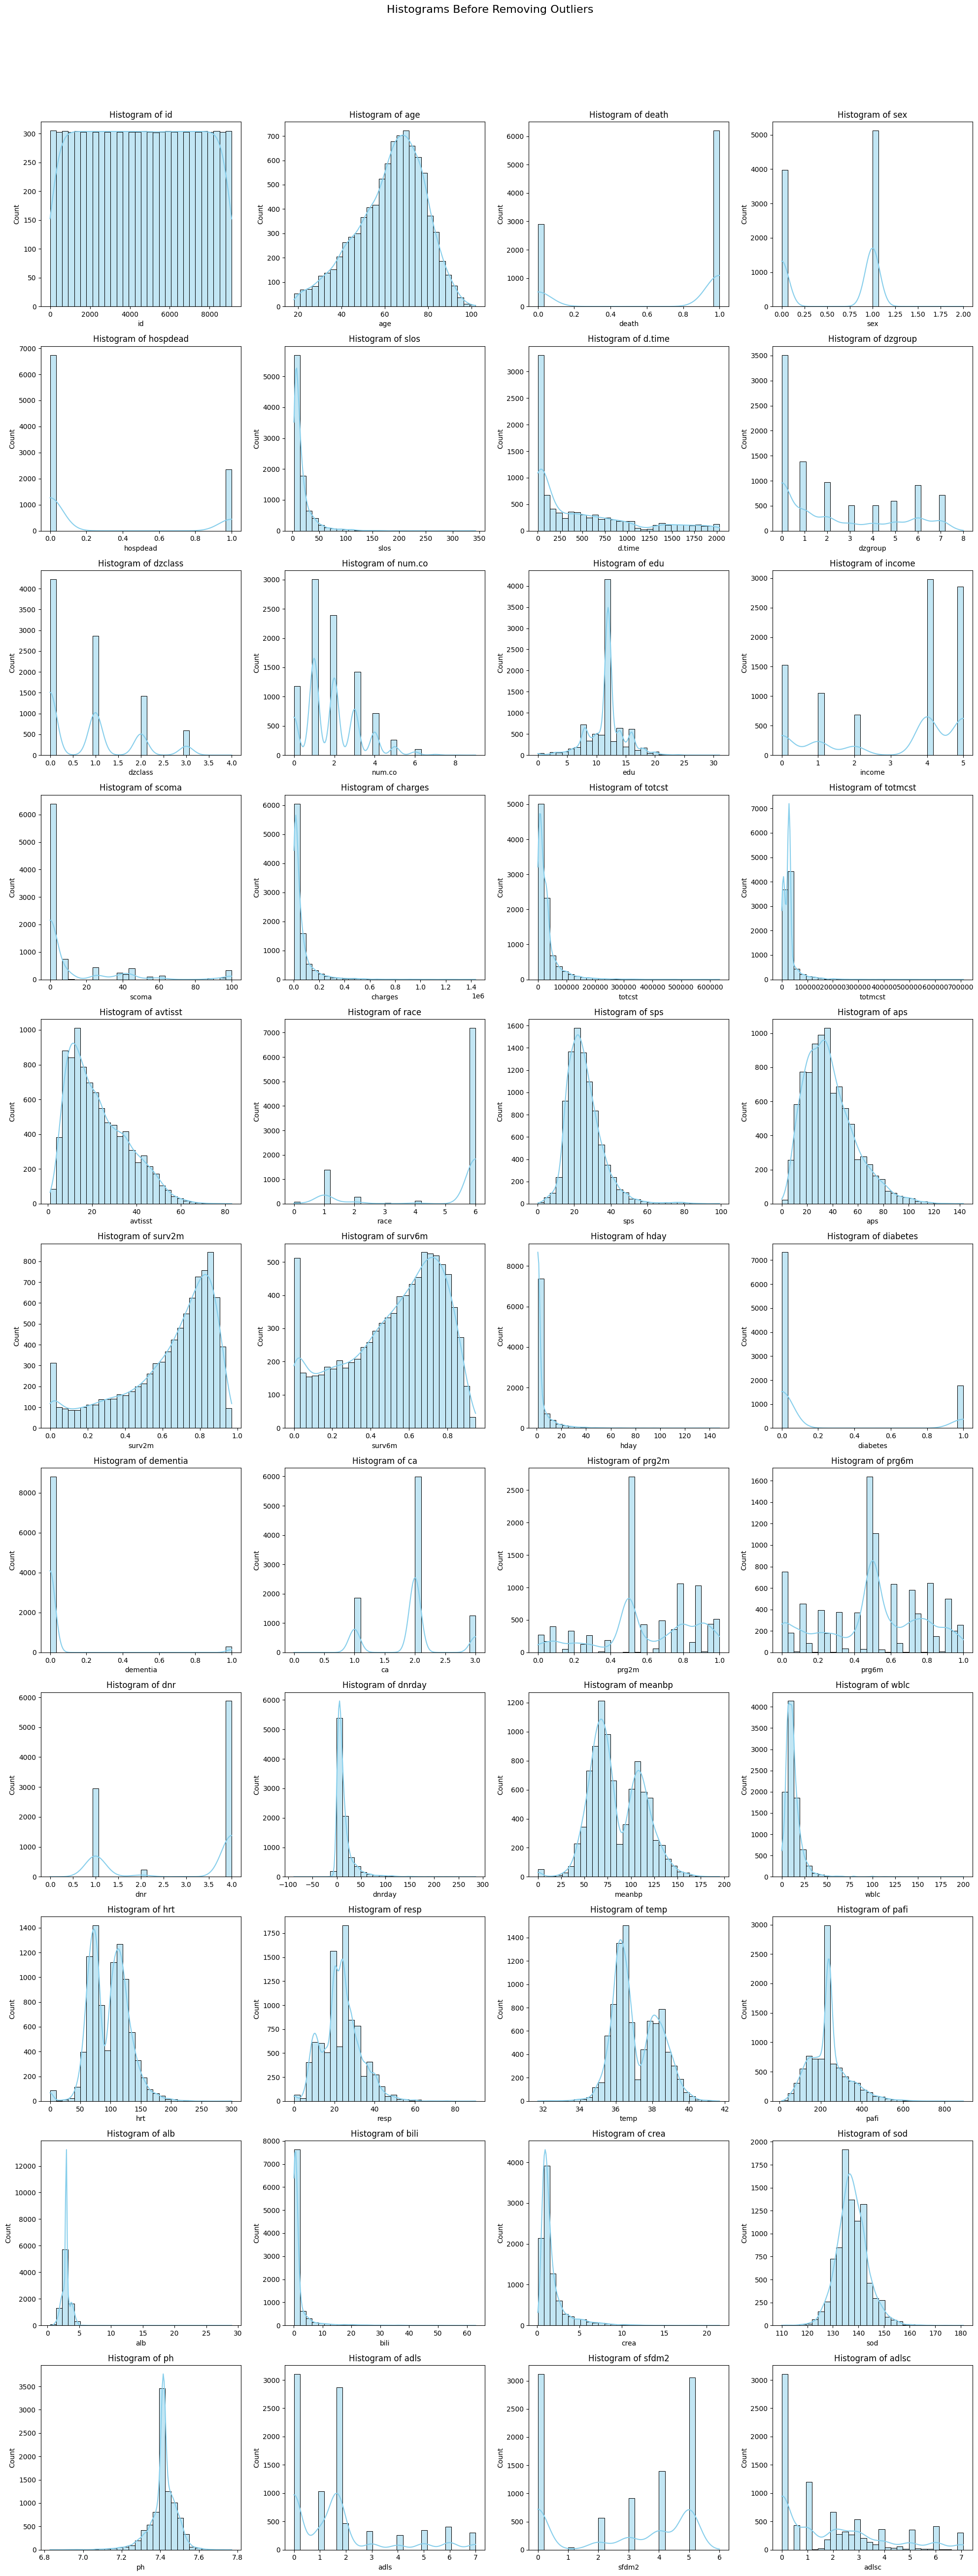

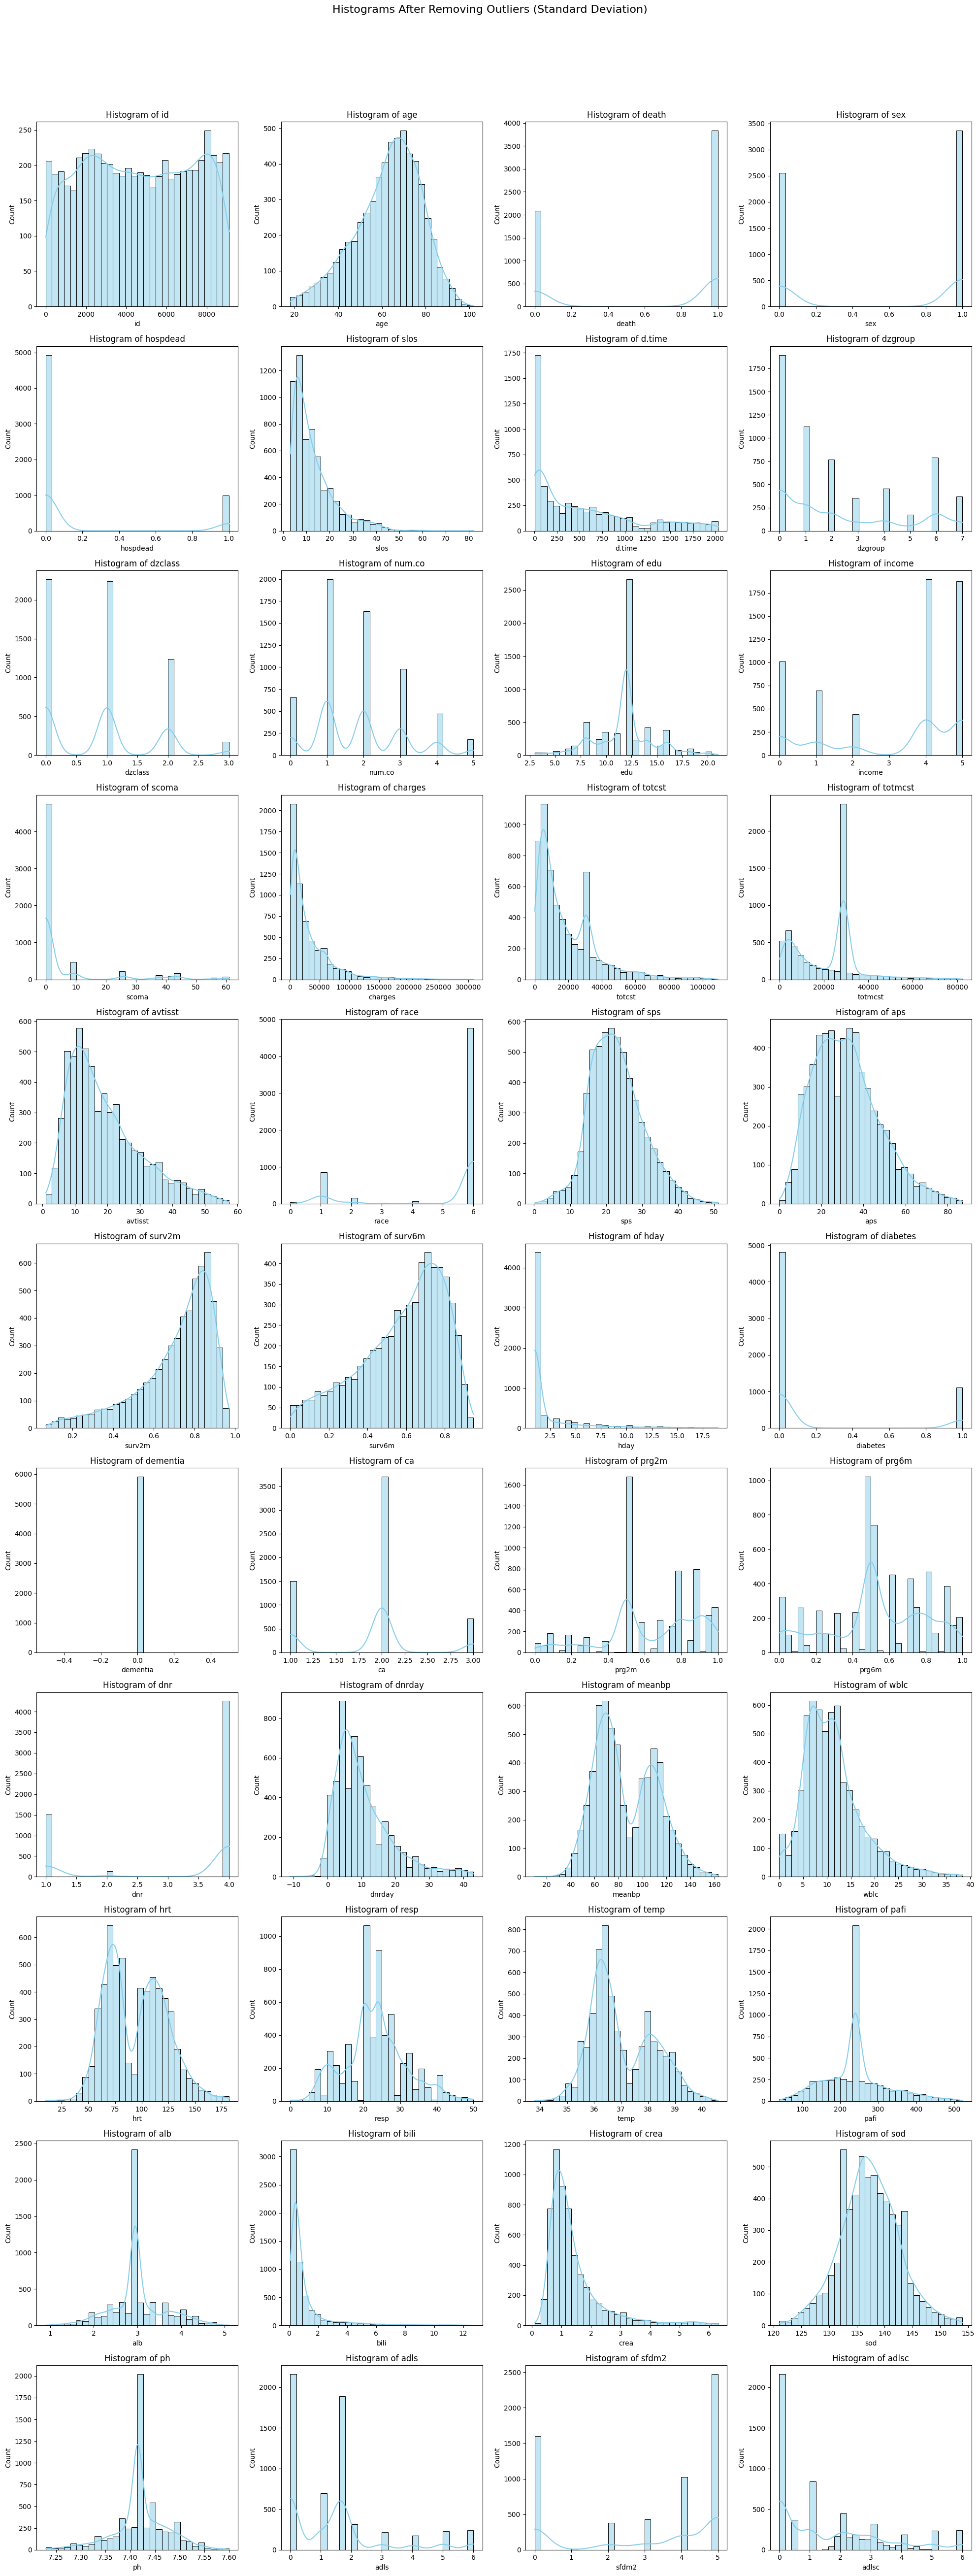

In [42]:
#Folder for save graph 
plots_dir = './csv/plots'
if not os.path.exists(plots_dir):
    os.makedirs(plots_dir)

# Histogram Plot 
def plot_histograms(df, columns, title, filename):
    num_cols = len(columns)
    num_rows = (num_cols // 4) + (num_cols % 4 > 0)  # แสดง 4 กราฟต่อแถว
    plt.figure(figsize=(20, 5 * num_rows))
    for i, column in enumerate(columns, 1):
        plt.subplot(num_rows, 4, i)
        sns.histplot(df[column], kde=True, bins=30, color='skyblue')
        plt.title(f'Histogram of {column}')
    plt.suptitle(title, fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.savefig(os.path.join(plots_dir, filename))
    plt.show()

#Plot Histogram with Outliers
plot_histograms(data, numeric_columns, "Histograms Before Removing Outliers", 'hist_before_outlier_removal.png')

#Plot Histogram without Outliers
plot_histograms(df_std, outlier_columns, "Histograms After Removing Outliers (Standard Deviation)", 'hist_after_std_outlier_removal.png')



จัดการกราฟให้มีการกระจายข้อมูลที่ดีขึ้นและทำการ Normalization ให้ข้อมูลอยู่ในช่วง 0-1 

- จัดการกราฟให้มีการกระจายตัวที่ดีขึ้น ประกอบด้วย 3 วิธี คือ Log ,Squre Root และBox-Cox Method โดยเลือกใช้วิธีที่ได้ค่า skewness ใกล้เคียงกับ 0 มากที่สุด 


--- Column: age ---
Best transformation for age: Box-Cox (Skewness: -0.09)

--- Column: slos ---
Best transformation for slos: Box-Cox (Skewness: 0.02)

--- Column: d.time ---
Best transformation for d.time: Box-Cox (Skewness: -0.17)

--- Column: dzgroup ---
Best transformation for dzgroup: Square Root (Skewness: 0.02)

--- Column: dzclass ---
Best transformation for dzclass: Log (Skewness: -0.00)

--- Column: num.co ---
Best transformation for num.co: Log (Skewness: -0.44)

--- Column: edu ---
Best transformation for edu: Box-Cox (Skewness: 0.09)

--- Column: income ---
Best transformation for income: Log (Skewness: -0.98)

--- Column: scoma ---
Best transformation for scoma: Log (Skewness: 1.73)

--- Column: charges ---
Best transformation for charges: Box-Cox (Skewness: 0.01)

--- Column: totcst ---
Best transformation for totcst: Square Root (Skewness: 0.68)

--- Column: totmcst ---
Best transformation for totmcst: Square Root (Skewness: -0.27)

--- Column: avtisst ---
Best transf

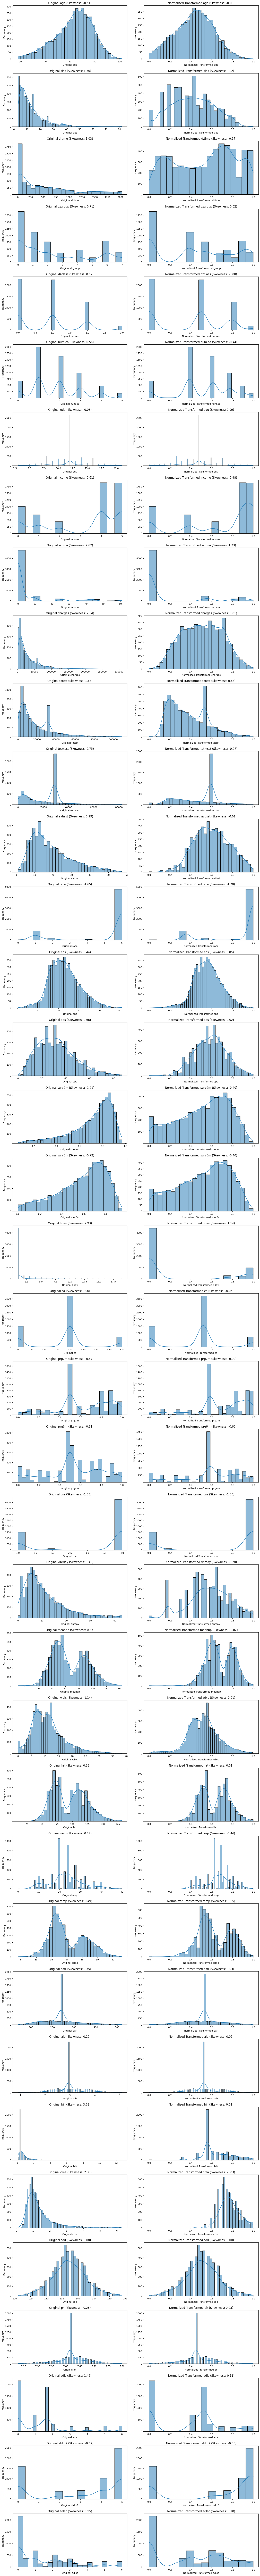

Normalized data saved to ./csv/normalizedd_data.csv


In [43]:
file_path = './csv/filled_no_outliner.csv'
data = pd.read_csv(file_path)

columns_to_transform = ['age', 'slos', 'd.time', 'dzgroup', 
                        'dzclass', 'num.co', 'edu', 'income', 'scoma', 'charges', 'totcst',
                        'totmcst', 'avtisst', 'race', 'sps', 'aps', 'surv2m', 'surv6m', 'hday',
                        'ca', 'prg2m', 'prg6m', 'dnr', 'dnrday',
                        'meanbp', 'wblc', 'hrt', 'resp', 'temp', 'pafi', 'alb', 'bili', 'crea',
                        'sod', 'ph', 'adls', 'sfdm2', 'adlsc']

# ฟังก์ชันในการประเมิน skewness และ plot
def plot_and_evaluate(column_data, title, ax):
    skewness = column_data.skew()
    sns.histplot(column_data.dropna(), kde=True, ax=ax)
    ax.set_title(f'{title} (Skewness: {skewness:.2f})')
    ax.set_xlabel(title)
    ax.set_ylabel('Frequency')
    return skewness

# สร้าง MinMaxScaler เพื่อ Normalize ข้อมูลให้อยู่ในช่วง 0-1
scaler = MinMaxScaler(feature_range=(0, 1))

# ฟังก์ชันในการ Normalize ข้อมูล (min-max scaling)
def normalize(column_data):
    # fit_transform ข้อมูลโดยใช้ MinMaxScaler โดยข้ามค่า NaN
    normalized = scaler.fit_transform(column_data.values.reshape(-1, 1))
    # แปลงกลับเป็น 1D (flatten) และคืนค่าเป็น pandas Series พร้อมกับ index เดิม
    return pd.Series(normalized.flatten(), index=column_data.index)

# เตรียม Dictionary เพื่อเก็บข้อมูลที่ Normalize แล้ว
normalized_data_dict = {}

# ตั้งค่า grid ของ subplots
rows = len(columns_to_transform)
fig, axes = plt.subplots(rows, 2, figsize=(16, 4 * rows))
fig.tight_layout(pad=4.0)

# วนลูปผ่านแต่ละคอลัมน์และทำการแปลง
for i, column in enumerate(columns_to_transform):
    if column in data.columns and column != 'id':
        print(f"\n--- Column: {column} ---")
        
        column_data = data[column].copy()
        
        mask = column_data >= 0
        
        if mask.any():
            # Plot ข้อมูลต้นฉบับ
            ax_original = axes[i, 0]
            plot_and_evaluate(column_data[mask], f'Original {column}', ax_original)
            
            # ทำการแปลงต่างๆ
            log_transformed_data = pd.Series(np.log1p(column_data[mask]), index=column_data[mask].index)
            sqrt_transformed_data = pd.Series(np.sqrt(column_data[mask]), index=column_data[mask].index)
            
            # Box-Cox ต้องการค่ามากกว่า 0
            try:
                boxcox_transformed_data, _ = stats.boxcox(column_data[mask])
                boxcox_transformed_data = pd.Series(boxcox_transformed_data, index=column_data[mask].index)
                boxcox_skewness = boxcox_transformed_data.skew()
            except ValueError:
                boxcox_transformed_data = pd.Series(np.nan, index=column_data[mask].index)
                boxcox_skewness = np.nan
            
            # คำนวณ skewness
            skew_log = log_transformed_data.skew()
            skew_sqrt = sqrt_transformed_data.skew()
            skew_boxcox = boxcox_skewness
            
            skewness_values = {
                'Log': skew_log,
                'Square Root': skew_sqrt,
                'Box-Cox': skew_boxcox
            }
            
            # เลือกวิธีที่ skewness ใกล้เคียงกับ 0 มากที่สุด
            best_transformation = min(
                [k for k in skewness_values if not np.isnan(skewness_values[k])],
                key=lambda k: abs(skewness_values[k])
            )
            
            print(f"Best transformation for {column}: {best_transformation} (Skewness: {skewness_values[best_transformation]:.2f})")
            
            # เลือกข้อมูลที่ถูกแปลงดีที่สุด
            if best_transformation == 'Log':
                best_transformed_data = log_transformed_data
            elif best_transformation == 'Square Root':
                best_transformed_data = sqrt_transformed_data
            elif best_transformation == 'Box-Cox':
                best_transformed_data = boxcox_transformed_data
            
            # สร้าง Series สำหรับการแปลงทั้งหมด โดยแทนที่เฉพาะค่าที่มากกว่า 0
            transformed_full = pd.Series(np.nan, index=column_data.index)
            transformed_full[mask] = best_transformed_data
            
            # นำข้อมูลที่ถูกแปลงดีที่สุดแล้วมา normalize ให้อยู่ในช่วง 0-1
            normalized_data = normalize(transformed_full)
            normalized_data_dict[column] = normalized_data
            
            # Plot ข้อมูลที่ Normalize แล้ว
            ax_norm = axes[i, 1]
            plot_and_evaluate(normalized_data, f'Normalized Transformed {column}', ax_norm)
        
        else:
            print(f"Skipping column '{column}' because it has no positive values.")
    else:
        print(f"Column '{column}' not found in the dataset.")

plt.show()

# สร้าง DataFrame จาก normalized_data_dict
normalized_df = pd.DataFrame(normalized_data_dict)

final_data = data.copy()
for column in normalized_data_dict:
    final_data[column] = normalized_df[column]

# บันทึกข้อมูลลงในไฟล์ CSV
output_file_path = './csv/normalizedd_data.csv'
final_data.to_csv(output_file_path, index=False)

print(f"Normalized data saved to {output_file_path}")


# Data Preprocessing


In [4]:
file_path = './csv/filled_no_outliner.csv'
df = pd.read_csv(file_path)

X = df.drop('death', axis=1)  # Features
y = df['death']               # Target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Baseline Models

Before tuning, it's important to establish a baseline model for comparison. We'll start with:
1. **Random Forest**: An ensemble model that creates multiple decision trees and averages their predictions.
2. **Support Vector Machine (SVM)**: A model that aims to find the optimal boundary separating classes.
3. **Neural Network**: A basic feedforward neural network.

### Random Forest
1. `n_estimators`: Number of trees in the forest.
2. `max_depth`: Maximum depth of each tree. Deeper trees can model more complex relationships but may overfit.
3. `min_samples_split`: Minimum number of samples required to split a node.

### SVM
1. `C`: Regularization parameter that controls the trade-off between achieving a low training error and a low testing error.
2. `kernel`: Specifies the kernel type to be used in the algorithm (linear, polynomial, etc.).

### Neural Network
1. `hidden_layer_sizes`: Number of neurons in each hidden layer.
2. `activation`: Activation function for neurons (e.g., ReLU, tanh).
3. `learning_rate`: The step size used in updating the weights.



Let's train these models with default hyperparameters:


In [5]:
# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

# SVM
svm = SVC(random_state=42)
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)

# Neural Network
nn = MLPClassifier(random_state=42, max_iter=1000, learning_rate_init=0.001)
nn.fit(X_train, y_train)
nn_pred = nn.predict(X_test)

# Evaluate models
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print("SVM Accuracy:", accuracy_score(y_test, svm_pred))
print("Neural Network Accuracy:", accuracy_score(y_test, nn_pred))


Random Forest Accuracy: 0.8952702702702703
SVM Accuracy: 0.887668918918919
Neural Network Accuracy: 0.8766891891891891


# Hyperparameter Tuning Methods 
## 1.Grid Search
### Random Forest (Grid Search)
1. `n_estimators`: Number of trees in the forest.
2. `max_depth`: Maximum depth of each tree. Deeper trees can model more complex relationships but may overfit.
3. `min_samples_split`: Minimum number of samples required to split a node.

In [12]:
# Define the grid for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Initialize Grid Search
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, verbose=2,scoring='accuracy')
grid_search_rf.fit(X_train, y_train)

# Best hyperparameters
print("Best Hyperparameters for Random Forest:", grid_search_rf.best_params_)
print("Best Score:", grid_search_rf.best_score_)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=   1.2s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=   1.3s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=   1.2s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=   1.2s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=   1.3s
[CV] END max_depth=None, min_samples_split=2, n_estimators=300; total time=   1.9s
[CV] END max_depth=None, 

### SVM (Grid Search)
We'll tune the following hyperparameters:
1. `C`: Regularization parameter.
2. `kernel`: Type of kernel (linear, polynomial, RBF).
3. `gamma`: Kernel coefficient for RBF and polynomial kernels.

In [11]:
# Define the grid for SVM
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

# Initialize Grid Search for SVM
grid_search_svm = GridSearchCV(estimator=svm, param_grid=param_grid_svm, cv=5, verbose=2)
grid_search_svm.fit(X_train, y_train)

# Best hyperparameters for SVM
print("Best Hyperparameters for SVM:", grid_search_svm.best_params_)
print("Best Score:", grid_search_svm.best_score_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.1s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.1s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.1s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.1s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.1s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.3s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.4s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.4s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.3s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.4s
[CV] END ...................C=0.1, gamma=auto, kernel=linear; total time=   0.1s
[CV] END ...................C=0.1, gamma=auto, k

### Neural Network (Grid Search)

For the **Neural Network**, we'll tune:
1. `hidden_layer_sizes`: The number of neurons in the hidden layers.
2. `activation`: Activation function for neurons.
3. `learning_rate_init`: Initial learning rate.


In [10]:
# Define the hyperparameter space for Neural Network
param_grid_nn = {
    'hidden_layer_sizes': [(50,), (100,), (150,)],
    'activation': ['relu', 'tanh'],
    'learning_rate_init': [0.001, 0.01, 0.1]
}

grid_search_nn = GridSearchCV(estimator=nn,  param_grid=param_grid_nn, cv=5, verbose=2)
grid_search_nn.fit(X_train, y_train)

# Best hyperparameters for Neural Network
print("Best Hyperparameters for Neural Network:", grid_search_nn.best_params_)
print("Best Score:",grid_search_nn.best_score_)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] END activation=relu, hidden_layer_sizes=(50,), learning_rate_init=0.001; total time=   3.6s
[CV] END activation=relu, hidden_layer_sizes=(50,), learning_rate_init=0.001; total time=   3.4s
[CV] END activation=relu, hidden_layer_sizes=(50,), learning_rate_init=0.001; total time=   3.9s
[CV] END activation=relu, hidden_layer_sizes=(50,), learning_rate_init=0.001; total time=   3.9s
[CV] END activation=relu, hidden_layer_sizes=(50,), learning_rate_init=0.001; total time=   3.5s
[CV] END activation=relu, hidden_layer_sizes=(50,), learning_rate_init=0.01; total time=   0.6s
[CV] END activation=relu, hidden_layer_sizes=(50,), learning_rate_init=0.01; total time=   0.8s
[CV] END activation=relu, hidden_layer_sizes=(50,), learning_rate_init=0.01; total time=   0.7s
[CV] END activation=relu, hidden_layer_sizes=(50,), learning_rate_init=0.01; total time=   0.8s
[CV] END activation=relu, hidden_layer_sizes=(50,), learning_rate_init

## 2.Randomized Search
### Random Forest (Randomized Search)
1. `n_estimators`: Number of trees in the forest.
2. `max_depth`: Maximum depth of each tree. Deeper trees can model more complex relationships but may overfit.
3. `min_samples_split`: Minimum number of samples required to split a node.

In [15]:
# Define the hyperparameter space for Random Forest
param_dist_rf = {
    'n_estimators': [int(x) for x in np.linspace(100, 500, 10)],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Initialize Randomized Search
random_search_rf = RandomizedSearchCV(estimator=rf, param_distributions=param_dist_rf, n_iter=10, cv=5, verbose=2)
random_search_rf.fit(X_train, y_train)

# Best hyperparameters
print("Best Hyperparameters for Random Forest (Randomized Search):", random_search_rf.best_params_)
print("Best Score:",random_search_rf.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=20, min_samples_split=5, n_estimators=233; total time=   1.5s
[CV] END max_depth=20, min_samples_split=5, n_estimators=233; total time=   1.5s
[CV] END max_depth=20, min_samples_split=5, n_estimators=233; total time=   1.4s
[CV] END max_depth=20, min_samples_split=5, n_estimators=233; total time=   1.4s
[CV] END max_depth=20, min_samples_split=5, n_estimators=233; total time=   1.5s
[CV] END max_depth=None, min_samples_split=2, n_estimators=277; total time=   1.8s
[CV] END max_depth=None, min_samples_split=2, n_estimators=277; total time=   1.8s
[CV] END max_depth=None, min_samples_split=2, n_estimators=277; total time=   1.7s
[CV] END max_depth=None, min_samples_split=2, n_estimators=277; total time=   1.7s
[CV] END max_depth=None, min_samples_split=2, n_estimators=277; total time=   1.7s
[CV] END max_depth=20, min_samples_split=5, n_estimators=500; total time=   3.1s
[CV] END max_depth=20, min_samples_spl

### SVM (Randomized Search)
We'll tune the following hyperparameters:
1. `C`: Regularization parameter.
2. `kernel`: Type of kernel (linear, polynomial, RBF).
3. `gamma`: Kernel coefficient for RBF and polynomial kernels.

In [16]:
# Define the grid for SVM
param_dist_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

# Initialize Grid Search for SVM
random_search_svm = RandomizedSearchCV(estimator=svm, param_distributions=param_dist_svm, n_iter=10, cv=5, verbose=2)
random_search_svm.fit(X_train, y_train)

# Best hyperparameters for SVM
print("Best Hyperparameters for SVM:", random_search_svm.best_params_)
print("Best Score:", random_search_svm.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ...................C=10, gamma=scale, kernel=linear; total time=   2.9s
[CV] END ...................C=10, gamma=scale, kernel=linear; total time=   2.2s
[CV] END ...................C=10, gamma=scale, kernel=linear; total time=   2.1s
[CV] END ...................C=10, gamma=scale, kernel=linear; total time=   2.0s
[CV] END ...................C=10, gamma=scale, kernel=linear; total time=   2.1s
[CV] END ....................C=1, gamma=scale, kernel=linear; total time=   0.3s
[CV] END ....................C=1, gamma=scale, kernel=linear; total time=   0.3s
[CV] END ....................C=1, gamma=scale, kernel=linear; total time=   0.3s
[CV] END ....................C=1, gamma=scale, kernel=linear; total time=   0.3s
[CV] END ....................C=1, gamma=scale, kernel=linear; total time=   0.3s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.3s
[CV] END .....................C=0.1, gamma=scale

### Neural Network (Randomized Search)

For the **Neural Network**, we'll tune:
1. `hidden_layer_sizes`: The number of neurons in the hidden layers.
2. `activation`: Activation function for neurons.
3. `learning_rate_init`: Initial learning rate.

In [17]:
# Define the hyperparameter space for Neural Network
param_dist_nn = {
    'hidden_layer_sizes': [(50,), (100,), (150,)],
    'activation': ['relu', 'tanh'],
    'learning_rate_init': [0.001, 0.01, 0.1]
}

# Initialize Randomized Search for Neural Network
random_search_nn = RandomizedSearchCV(estimator=nn, param_distributions=param_dist_nn, n_iter=10, cv=5, verbose=2)
random_search_nn.fit(X_train, y_train)

# Best hyperparameters for Neural Network
print("Best Hyperparameters for Neural Network:", random_search_nn.best_params_)
print("Best Score:",random_search_nn.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END activation=relu, hidden_layer_sizes=(100,), learning_rate_init=0.1; total time=   0.4s
[CV] END activation=relu, hidden_layer_sizes=(100,), learning_rate_init=0.1; total time=   0.2s
[CV] END activation=relu, hidden_layer_sizes=(100,), learning_rate_init=0.1; total time=   0.4s
[CV] END activation=relu, hidden_layer_sizes=(100,), learning_rate_init=0.1; total time=   0.4s
[CV] END activation=relu, hidden_layer_sizes=(100,), learning_rate_init=0.1; total time=   0.2s
[CV] END activation=relu, hidden_layer_sizes=(150,), learning_rate_init=0.001; total time=   3.6s
[CV] END activation=relu, hidden_layer_sizes=(150,), learning_rate_init=0.001; total time=   4.1s
[CV] END activation=relu, hidden_layer_sizes=(150,), learning_rate_init=0.001; total time=   3.6s
[CV] END activation=relu, hidden_layer_sizes=(150,), learning_rate_init=0.001; total time=   3.9s
[CV] END activation=relu, hidden_layer_sizes=(150,), learning_rate_

## 3. Bayesian Optimization
### Random Forest (Bayesian)
1. `n_estimators`: Number of trees in the forest.
2. `max_depth`: Maximum depth of each tree. Deeper trees can model more complex relationships but may overfit.
3. `min_samples_split`: Minimum number of samples required to split a node.

In [20]:
# Define the hyperparameter space for Random Forest
param_space_rf = {
    'n_estimators': [int(x) for x in np.linspace(100, 500, 10)],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Initialize Bayesian Search for Random Forest
bayes_search_rf = BayesSearchCV(
    estimator=rf,
    search_spaces=param_space_rf,
    n_iter=10,  # Number of iterations for search
    cv=5,       # 5-fold cross-validation
    verbose=2
)

# Train the Random Forest model using Bayesian Optimization
bayes_search_rf.fit(X_train, y_train)

# Best hyperparameters for Random Forest using Bayesian Optimization
print("Best Hyperparameters for Random Forest (Bayesian):", bayes_search_rf.best_params_)
print("Best Score:", bayes_search_rf.best_score_)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END max_depth=20, min_samples_split=10, n_estimators=144; total time=   0.9s
[CV] END max_depth=20, min_samples_split=10, n_estimators=144; total time=   0.8s
[CV] END max_depth=20, min_samples_split=10, n_estimators=144; total time=   0.8s
[CV] END max_depth=20, min_samples_split=10, n_estimators=144; total time=   0.8s
[CV] END max_depth=20, min_samples_split=10, n_estimators=144; total time=   0.8s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END max_depth=30, min_samples_split=2, n_estimators=455; total time=   2.9s
[CV] END max_depth=30, min_samples_split=2, n_estimators=455; total time=   3.0s
[CV] END max_depth=30, min_samples_split=2, n_estimators=455; total time=   2.9s
[CV] END max_depth=30, min_samples_split=2, n_estimators=455; total time=   2.9s
[CV] END max_depth=30, min_samples_split=2, n_estimators=455; total time=   2.9s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END

### SVM (Bayesian)
We'll tune the following hyperparameters:
1. `C`: Regularization parameter.
2. `kernel`: Type of kernel (linear, polynomial, RBF).
3. `gamma`: Kernel coefficient for RBF and polynomial kernels.

In [7]:
# Define the parameter space for SVM
param_space_svm = {
    'C': (1e-6, 1e+6, 'log-uniform'),
    'kernel': ['linear', 'rbf'],
    'gamma': (1e-6, 1e+1, 'log-uniform')
}

# Initialize Bayesian Search for SVM
bayes_search_svm = BayesSearchCV(estimator=svm, search_spaces=param_space_svm, n_iter=10, cv=5, verbose=2)
bayes_search_svm.fit(X_train, y_train)

# Best hyperparameters for SVM using Bayesian Optimization
print("Best Hyperparameters for SVM (Bayesian):", bayes_search_svm.best_params_)
print("Best Score:",bayes_search_svm.best_score_)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END C=5.180459321605108e-05, gamma=0.03106531070884426, kernel=linear; total time=   0.2s
[CV] END C=5.180459321605108e-05, gamma=0.03106531070884426, kernel=linear; total time=   0.2s
[CV] END C=5.180459321605108e-05, gamma=0.03106531070884426, kernel=linear; total time=   0.3s
[CV] END C=5.180459321605108e-05, gamma=0.03106531070884426, kernel=linear; total time=   0.2s
[CV] END C=5.180459321605108e-05, gamma=0.03106531070884426, kernel=linear; total time=   0.2s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END C=2828.1923303419685, gamma=7.441637573197474e-06, kernel=rbf; total time=   0.2s
[CV] END C=2828.1923303419685, gamma=7.441637573197474e-06, kernel=rbf; total time=   0.2s
[CV] END C=2828.1923303419685, gamma=7.441637573197474e-06, kernel=rbf; total time=   0.2s
[CV] END C=2828.1923303419685, gamma=7.441637573197474e-06, kernel=rbf; total time=   0.2s
[CV] END C=2828.1923303419685, gamma=7.4416

### Neural Network (Bayesian)

For the **Neural Network**, we'll tune:
1. `hidden_layer_sizes`: The number of neurons in the hidden layers.
2. `activation`: Activation function for neurons.
3. `learning_rate_init`: Initial learning rate.


In [21]:
# Define the hyperparameter space for Neural Network
param_space_nn = {
    'hidden_layer_sizes': Integer(50, 200),
    'alpha': Real(1e-5, 1e-2, prior='log-uniform'),
    'learning_rate_init': Real(1e-4, 1e-2, prior='log-uniform'),
    'max_iter': Integer(100, 500)
}

# Initialize Bayesian Search for Neural Network
bayes_search_nn = BayesSearchCV(
    estimator=nn,
    search_spaces=param_space_nn,
    n_iter=10,  # Number of iterations for search
    cv=5,       # 5-fold cross-validation
    verbose=2
)

# Train the Neural Network model using Bayesian Optimization
bayes_search_nn.fit(X_train, y_train)

# Best hyperparameters for Neural Network using Bayesian Optimization
print("Best Hyperparameters for Neural Network (Bayesian):", bayes_search_nn.best_params_)
print("Best Score:", bayes_search_nn.best_score_)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END alpha=0.00017297296487815496, hidden_layer_sizes=136, learning_rate_init=0.0015312798632563848, max_iter=288; total time=   3.0s
[CV] END alpha=0.00017297296487815496, hidden_layer_sizes=136, learning_rate_init=0.0015312798632563848, max_iter=288; total time=   3.1s
[CV] END alpha=0.00017297296487815496, hidden_layer_sizes=136, learning_rate_init=0.0015312798632563848, max_iter=288; total time=   3.1s
[CV] END alpha=0.00017297296487815496, hidden_layer_sizes=136, learning_rate_init=0.0015312798632563848, max_iter=288; total time=   2.8s
[CV] END alpha=0.00017297296487815496, hidden_layer_sizes=136, learning_rate_init=0.0015312798632563848, max_iter=288; total time=   2.7s
Fitting 5 folds for each of 1 candidates, totalling 5 fits


c:\Users\anawa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (338) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=7.717473801260112e-05, hidden_layer_sizes=75, learning_rate_init=0.0002309360342078171, max_iter=338; total time=   3.1s


c:\Users\anawa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (338) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=7.717473801260112e-05, hidden_layer_sizes=75, learning_rate_init=0.0002309360342078171, max_iter=338; total time=   3.1s


c:\Users\anawa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (338) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=7.717473801260112e-05, hidden_layer_sizes=75, learning_rate_init=0.0002309360342078171, max_iter=338; total time=   3.1s


c:\Users\anawa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (338) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=7.717473801260112e-05, hidden_layer_sizes=75, learning_rate_init=0.0002309360342078171, max_iter=338; total time=   3.1s


c:\Users\anawa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (338) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=7.717473801260112e-05, hidden_layer_sizes=75, learning_rate_init=0.0002309360342078171, max_iter=338; total time=   3.1s
Fitting 5 folds for each of 1 candidates, totalling 5 fits


c:\Users\anawa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (383) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=3.025198086852537e-05, hidden_layer_sizes=190, learning_rate_init=0.0003129954819212562, max_iter=383; total time=   5.6s


c:\Users\anawa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (383) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=3.025198086852537e-05, hidden_layer_sizes=190, learning_rate_init=0.0003129954819212562, max_iter=383; total time=   5.6s


c:\Users\anawa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (383) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=3.025198086852537e-05, hidden_layer_sizes=190, learning_rate_init=0.0003129954819212562, max_iter=383; total time=   5.8s


c:\Users\anawa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (383) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=3.025198086852537e-05, hidden_layer_sizes=190, learning_rate_init=0.0003129954819212562, max_iter=383; total time=   5.7s


c:\Users\anawa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (383) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=3.025198086852537e-05, hidden_layer_sizes=190, learning_rate_init=0.0003129954819212562, max_iter=383; total time=   5.6s
Fitting 5 folds for each of 1 candidates, totalling 5 fits


c:\Users\anawa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (115) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.0013441621668353544, hidden_layer_sizes=194, learning_rate_init=0.00017503898428332073, max_iter=115; total time=   1.7s


c:\Users\anawa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (115) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.0013441621668353544, hidden_layer_sizes=194, learning_rate_init=0.00017503898428332073, max_iter=115; total time=   1.8s


c:\Users\anawa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (115) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.0013441621668353544, hidden_layer_sizes=194, learning_rate_init=0.00017503898428332073, max_iter=115; total time=   1.7s


c:\Users\anawa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (115) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.0013441621668353544, hidden_layer_sizes=194, learning_rate_init=0.00017503898428332073, max_iter=115; total time=   1.7s


c:\Users\anawa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (115) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.0013441621668353544, hidden_layer_sizes=194, learning_rate_init=0.00017503898428332073, max_iter=115; total time=   1.7s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END alpha=2.361115082864236e-05, hidden_layer_sizes=130, learning_rate_init=0.002344883913934623, max_iter=456; total time=   2.2s
[CV] END alpha=2.361115082864236e-05, hidden_layer_sizes=130, learning_rate_init=0.002344883913934623, max_iter=456; total time=   2.2s
[CV] END alpha=2.361115082864236e-05, hidden_layer_sizes=130, learning_rate_init=0.002344883913934623, max_iter=456; total time=   2.1s
[CV] END alpha=2.361115082864236e-05, hidden_layer_sizes=130, learning_rate_init=0.002344883913934623, max_iter=456; total time=   2.1s
[CV] END alpha=2.361115082864236e-05, hidden_layer_sizes=130, learning_rate_init=0.002344883913934623, max_iter=456; total time=   2.1s
Fitting 5 folds for each of 1 candidates, totalling 5 fits


c:\Users\anawa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (176) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.00010360592600617215, hidden_layer_sizes=158, learning_rate_init=0.0009108474339303068, max_iter=176; total time=   2.2s


c:\Users\anawa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (176) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.00010360592600617215, hidden_layer_sizes=158, learning_rate_init=0.0009108474339303068, max_iter=176; total time=   2.3s


c:\Users\anawa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (176) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.00010360592600617215, hidden_layer_sizes=158, learning_rate_init=0.0009108474339303068, max_iter=176; total time=   2.3s


c:\Users\anawa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (176) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.00010360592600617215, hidden_layer_sizes=158, learning_rate_init=0.0009108474339303068, max_iter=176; total time=   2.3s


c:\Users\anawa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (176) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.00010360592600617215, hidden_layer_sizes=158, learning_rate_init=0.0009108474339303068, max_iter=176; total time=   2.3s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END alpha=0.007289287312310021, hidden_layer_sizes=92, learning_rate_init=0.006926130760764543, max_iter=144; total time=   1.2s
[CV] END alpha=0.007289287312310021, hidden_layer_sizes=92, learning_rate_init=0.006926130760764543, max_iter=144; total time=   1.1s
[CV] END alpha=0.007289287312310021, hidden_layer_sizes=92, learning_rate_init=0.006926130760764543, max_iter=144; total time=   1.3s
[CV] END alpha=0.007289287312310021, hidden_layer_sizes=92, learning_rate_init=0.006926130760764543, max_iter=144; total time=   1.1s
[CV] END alpha=0.007289287312310021, hidden_layer_sizes=92, learning_rate_init=0.006926130760764543, max_iter=144; total time=   1.1s
Fitting 5 folds for each of 1 candidates, totalling 5 fits


c:\Users\anawa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (236) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.00021727182048883828, hidden_layer_sizes=72, learning_rate_init=0.0001445630206582579, max_iter=236; total time=   2.1s


c:\Users\anawa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (236) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.00021727182048883828, hidden_layer_sizes=72, learning_rate_init=0.0001445630206582579, max_iter=236; total time=   2.1s


c:\Users\anawa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (236) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.00021727182048883828, hidden_layer_sizes=72, learning_rate_init=0.0001445630206582579, max_iter=236; total time=   2.1s


c:\Users\anawa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (236) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.00021727182048883828, hidden_layer_sizes=72, learning_rate_init=0.0001445630206582579, max_iter=236; total time=   2.1s


c:\Users\anawa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (236) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.00021727182048883828, hidden_layer_sizes=72, learning_rate_init=0.0001445630206582579, max_iter=236; total time=   2.1s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END alpha=0.0021441339320372654, hidden_layer_sizes=103, learning_rate_init=0.004673808915174973, max_iter=346; total time=   1.4s
[CV] END alpha=0.0021441339320372654, hidden_layer_sizes=103, learning_rate_init=0.004673808915174973, max_iter=346; total time=   1.5s
[CV] END alpha=0.0021441339320372654, hidden_layer_sizes=103, learning_rate_init=0.004673808915174973, max_iter=346; total time=   1.5s
[CV] END alpha=0.0021441339320372654, hidden_layer_sizes=103, learning_rate_init=0.004673808915174973, max_iter=346; total time=   1.4s
[CV] END alpha=0.0021441339320372654, hidden_layer_sizes=103, learning_rate_init=0.004673808915174973, max_iter=346; total time=   1.2s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END alpha=0.0059604598442544844, hidden_layer_sizes=175, lea

c:\Users\anawa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (236) reached and the optimization hasn't converged yet.
  warnings.warn(


# Results
### Baseline

In [8]:
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print("SVM Accuracy:", accuracy_score(y_test, svm_pred))
print("Neural Network Accuracy:", accuracy_score(y_test, nn_pred))

Random Forest Accuracy: 0.8952702702702703
SVM Accuracy: 0.887668918918919
Neural Network Accuracy: 0.8766891891891891


### Grid Search

In [13]:
print("Random Forest Accuracy:", grid_search_rf.best_score_)
print("SVM Accuracy:", grid_search_svm.best_score_)
print("Neural Network Accuracy:",grid_search_nn.best_score_)

Random Forest Accuracy: 0.8922445644530071
SVM Accuracy: 0.8698458021436337
Neural Network Accuracy: 0.8719595205511563


### Randomized Search

In [18]:
print("Random Forest Accuracy:",random_search_rf.best_score_)
print("SVM Accuracy:", random_search_svm.best_score_)
print("Neural Network Accuracy:",random_search_nn.best_score_)

Random Forest Accuracy: 0.8926678439313196
SVM Accuracy: 0.8698458021436337
Neural Network Accuracy: 0.8711134080918713


### Bayesian Search

In [22]:
print("Random Forest Accuracy:", bayes_search_rf.best_score_)
print("SVM Accuracy:",bayes_search_svm.best_score_)
print("Neural Network Accuracy:", bayes_search_nn.best_score_)

Random Forest Accuracy: 0.8909767352560996
SVM Accuracy: 0.8664660405285636
Neural Network Accuracy: 0.8723834697754789


# Plot ROC Graph

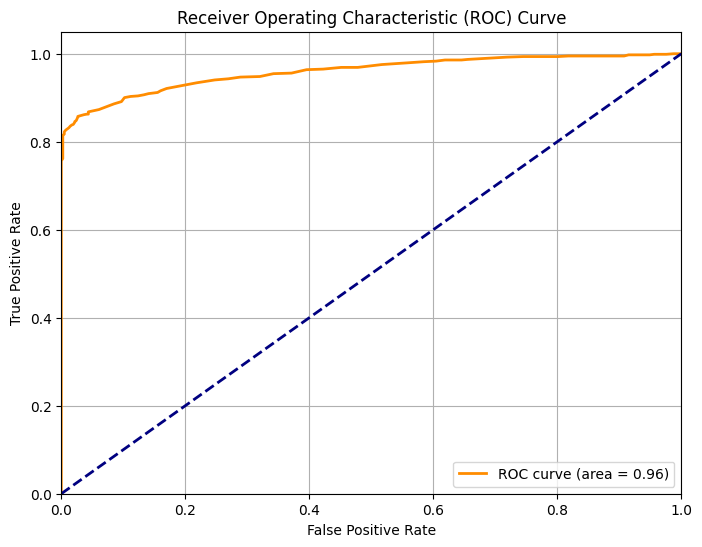

In [24]:
# Baseline Random Forest is best case 
best_model = rf

# Get the predicted probabilities for the positive class (1)
y_probs = best_model.predict_proba(X_test)[:, 1]  # Probability for the positive class

# Calculate the false positive rate, true positive rate, and thresholds for the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Calculate the AUC score
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line representing random guessing
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Confusion Matrix

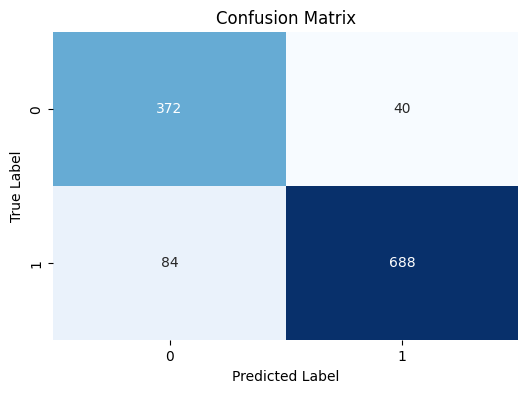

In [25]:
cm = confusion_matrix(y_test, rf_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()